In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
from os import listdir,makedirs
from os.path import isfile,join
import cv2

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,  Conv2D, Input, Lambda, Flatten, TimeDistributed
from tensorflow.keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers.core import Dense, Dropout, Activation
import np_utils
from keras.src.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Activation,Layer
#from keras.engine.topology import Layer
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import LeakyReLU

2024-04-19 18:24:09.976797: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-19 18:24:09.983796: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 18:24:10.092182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 18:24:10.092238: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 18:24:10.094266: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
import os
import shutil
#gt=os.path.join('/content/drive/MyDrive/Anomaly/BTech_Dataset_transformed/02/ground_truth')
#train_path='/content/drive/MyDrive/Anomaly/BTech_Dataset_transformed/02/train/ok'
#test_path='/content/drive/MyDrive/Anomaly/BTech_Dataset_transformed/02/test/ko'

# gt=os.path.join('/home/ai/Pritha/mvt/toothbrush/ground_truth/hole')
# train_path='/home/ai/Pritha/mvt/toothbrush/train/good'
# test_path='/home/ai/Pritha/mvt/toothbrush/test/defective'

# gt=os.path.join('/home/ai/Pritha/mvt/screw/ground_truth/scratch_neck')
# train_path='/home/ai/Pritha/mvt/screw/train/good'
# test_path='/home/ai/Pritha/mvt/screw/test/scratch_neck'

train_path='/home/ai/Pritha/autoencoder_with_3_layers/tile3/test/0_good/good'
test_path='/home/ai/Pritha/autoencoder_with_3_layers/tile3/test/1_defective/defective'

In [3]:
SIZE=128
batch_size = 20
from os.path import join

sz=len(os.listdir(train_path))
sz1=len(os.listdir(test_path))
y_train=np.zeros(sz)
train=np.zeros(shape=(sz,SIZE,SIZE,3))
merge=np.zeros(shape=((sz+sz1),SIZE,SIZE,3))
cnt=0
k=0
for r in os.listdir(train_path):
  img=Image.open(join(train_path,r)).resize((SIZE,SIZE))
  img=np.array(img,dtype=np.float32)/float(256)
  print(img.shape)  
  train[cnt,:,:,:]=img
  merge[k,:,:,:]=img
  y_train[cnt]=0
  cnt=cnt+1
  k=k+1
print('y_train')
print(y_train.shape)

test=np.zeros(shape=(sz1,SIZE,SIZE,3))
y_test=np.zeros(sz1)
cnt=0
for r in os.listdir(test_path):
  img=Image.open(join(test_path,r)).resize((SIZE,SIZE))
  img=np.array(img,dtype=np.float32)/float(256)
  test[cnt,:,:,:]=img
  merge[k,:,:,:]=img
  y_test[cnt]=1
  cnt=cnt+1
  k=k+1

X_train=train
X_test=test
#X_train = X_train.astype('float32') / 255.
#X_test = X_test.astype('float32') / 255.
#X_train = np.reshape(X_train, (len(X_train), SIZE, SIZE,3))
#X_test = np.reshape(X_test, (len(X_test), SIZE, SIZE, 3))

X_test.shape


#plt.imshow(X_test[2])

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

(84, 128, 128, 3)

In [7]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

validation_generator =datagen.flow(X_train, y_train, batch_size=batch_size)


anomaly_generator = datagen.flow(X_test, y_test , batch_size=batch_size)

print(train_generator)

In [4]:
path = 'tile_o/test2/2_defective/defective' # Source Folder
dstpath = 'tile3/test/1_defective/defective' # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")

files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))
for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        gray_three = cv2.merge([gray,gray,gray])
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,gray_three)
    except:
        print ("{} is not converted".format(image))

path = '/home/ai/Pritha/mvt/tile/train/good' # Source Folder
dstpath = 'tile3/test/0_good/good' # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")

files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))
for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        gray_three = cv2.merge([gray,gray,gray])
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,gray_three)
    except:
        print ("{} is not converted".format(image))

In [4]:
image_size = 128
batch_size = 10
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    'tile3/test/0_good/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='input'
    )

validation_generator = datagen.flow_from_directory(
    'tile3/test/0_good/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='input'
    )

anomaly_generator = datagen.flow_from_directory(
    'tile3/test/1_defective/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='input'
    )

test_generator = datagen.flow_from_directory(
    'tile3/test/',
    target_size=(image_size, image_size),
    batch_size=1,
    class_mode='binary'
    )

Found 230 images belonging to 1 classes.
Found 230 images belonging to 1 classes.
Found 84 images belonging to 1 classes.
Found 314 images belonging to 2 classes.


In [4]:
from tensorflow.python.ops.math_ops import xdivy
def SSIMLoss(y_true, y_pred):
    print(y_pred.shape)
    print(y_true.shape)
   # y_pred = tf.reshape(y_pred,[-1,128,128,1])
   # y_true = tf.reshape(y_true,[-1,128,128,1])
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred,1.0))

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the Autoencoder with Attention
def autoencoder_with_attention(input_shape):
    # Encoder
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    print(x.shape)
    x = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    print(x.shape)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    print(x.shape)

    # # Attention Mechanism
    # attention = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(x)
    # print(attention.shape)
    # #attention = layers.UpSampling2D((2, 2))(attention)
    # #attention = layers.UpSampling2D((2, 2))(attention)
    # print(attention.shape)
    # attention = layers.multiply([x, attention])

    # Decoder
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.UpSampling2D((2, 2))(x)
    print(x.shape)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.UpSampling2D((2, 2))(x)
    print(x.shape)
    x = layers.Conv2D(32, (3, 3), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    #x = layers.UpSampling2D((2, 2))(x)
    
    print(x.shape)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    print(decoded.shape)


    # Model
    model = models.Model(inputs, decoded)
    return model

# Example usage
input_shape = (128, 128, 3)  # Adjust input shape based on your data
model = autoencoder_with_attention(input_shape)
#model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

2024-04-19 18:24:36.951539: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


(None, 64, 64, 32)
(None, 64, 64, 64)
(None, 32, 32, 128)
(None, 64, 64, 128)
(None, 128, 128, 64)
(None, 128, 128, 32)
(None, 128, 128, 3)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                     

/home/ai/anaconda3/envs/py39tf215cpu/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2500
(None, 128, 128, 3)
(None, 128, 128, 3)


2024-04-19 18:25:09.888856: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'gradient_tape/model/leaky_re_lu_3/LeakyRelu/LeakyReluGrad' exist for missing node 'model/conv2d_3/BiasAdd'.


20/20 [==============================] - ETA: 0s - loss: 0.6157(None, 128, 128, 3)
(None, 128, 128, 3)
20/20 [==============================] - 32s 1s/step - loss: 0.6157 - val_loss: 0.4028
Epoch 2/2500
20/20 [==============================] - 28s 1s/step - loss: 0.3266 - val_loss: 0.2779
Epoch 3/2500
20/20 [==============================] - 28s 1s/step - loss: 0.2371 - val_loss: 0.2126
Epoch 4/2500
20/20 [==============================] - 28s 1s/step - loss: 0.1908 - val_loss: 0.1826
Epoch 5/2500
20/20 [==============================] - 28s 1s/step - loss: 0.1708 - val_loss: 0.1648
Epoch 6/2500
20/20 [==============================] - 28s 1s/step - loss: 0.1543 - val_loss: 0.1505
Epoch 7/2500
20/20 [==============================] - 28s 1s/step - loss: 0.1428 - val_loss: 0.1404
Epoch 8/2500
20/20 [==============================] - 28s 1s/step - loss: 0.1332 - val_loss: 0.1327
Epoch 9/2500
20/20 [==============================] - 28s 1s/step - loss: 0.1261 - val_loss: 0.1300
Epoch 10/2

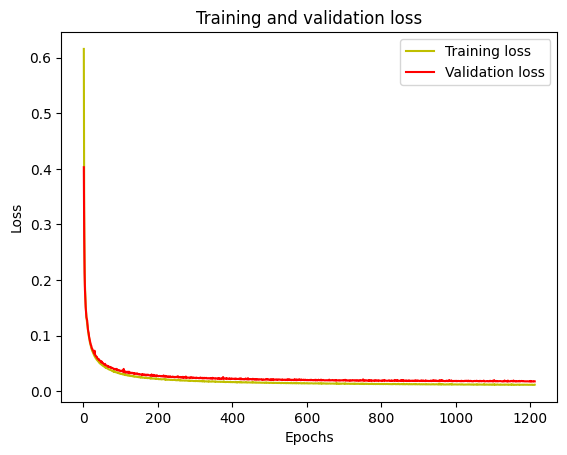

In [6]:

from keras.models import load_model
#from tf.keras import get_custom_objects

#get_custom_objects().update({'SSIMLoss': SSIMLoss})

import keras.losses

keras.losses.custom_loss = SSIMLoss

model.compile(optimizer='adam', loss='SSIMLoss')

model.save('tile1_a.h5')
model = tf.keras.models.load_model('tile1_a.h5',custom_objects ={'SSIMLoss':SSIMLoss})
#(X_train, X_train)
# Training the model
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50) # Early stopping (stops training when validation doesn't improve for {patience} epochs)
model_filepath = 'tile1_a.h5'
save_best = keras.callbacks.ModelCheckpoint(model_filepath, monitor='val_loss', save_best_only=True, mode='min') # Saves the best version of the model to disk (as measured on the validation data set)
# history= model.fit_generator(
#         train_generator,
#         epochs=300,
#         validation_data=validation_generator,
#         shuffle = True,
#         callbacks=[es, save_best])

history = model.fit(
       X_train,X_train,
       steps_per_epoch= 20 ,#// batch_size,
       epochs=2500,
       validation_data=(X_test,X_test),
      # validation_steps=75 // batch_size,
       shuffle = True,
callbacks=[es, save_best])

#plot the training and validation accuracy and loss at each epoch
model.save('tile1_a.h5')
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

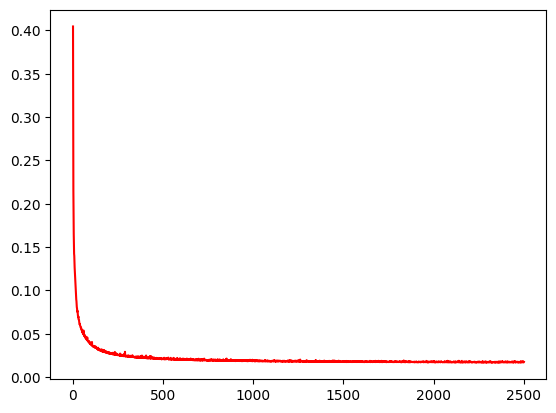

In [12]:
plt.plot(epochs, val_loss, 'r', label='Validation loss')

1/1 [==============================] - 0s 156ms/step


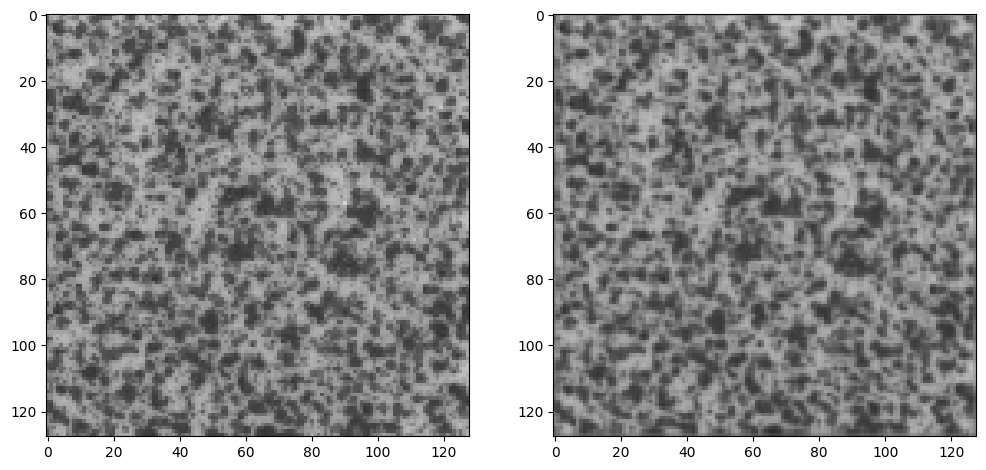

In [13]:
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])  #Predict on the first batch of images
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

8/8 [==============================] - 1s 149ms/step


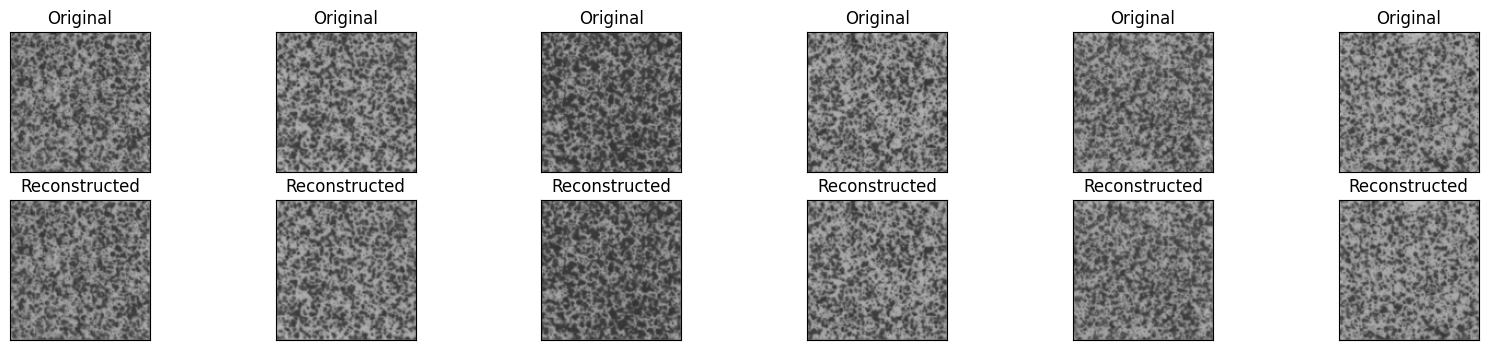

In [14]:
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])

decoded_imgs = model.predict(X_train)
n = 6
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [7]:
from keras.models import load_model
#from tf.keras import get_custom_objects

#get_custom_objects().update({'SSIMLoss': SSIMLoss})

import keras.losses

keras.losses.custom_loss = SSIMLoss

model.compile(optimizer='adam', loss='SSIMLoss')


model = tf.keras.models.load_model('tile1.h5',custom_objects ={'SSIMLoss':SSIMLoss})

3/3 [==============================] - 0s 138ms/step
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


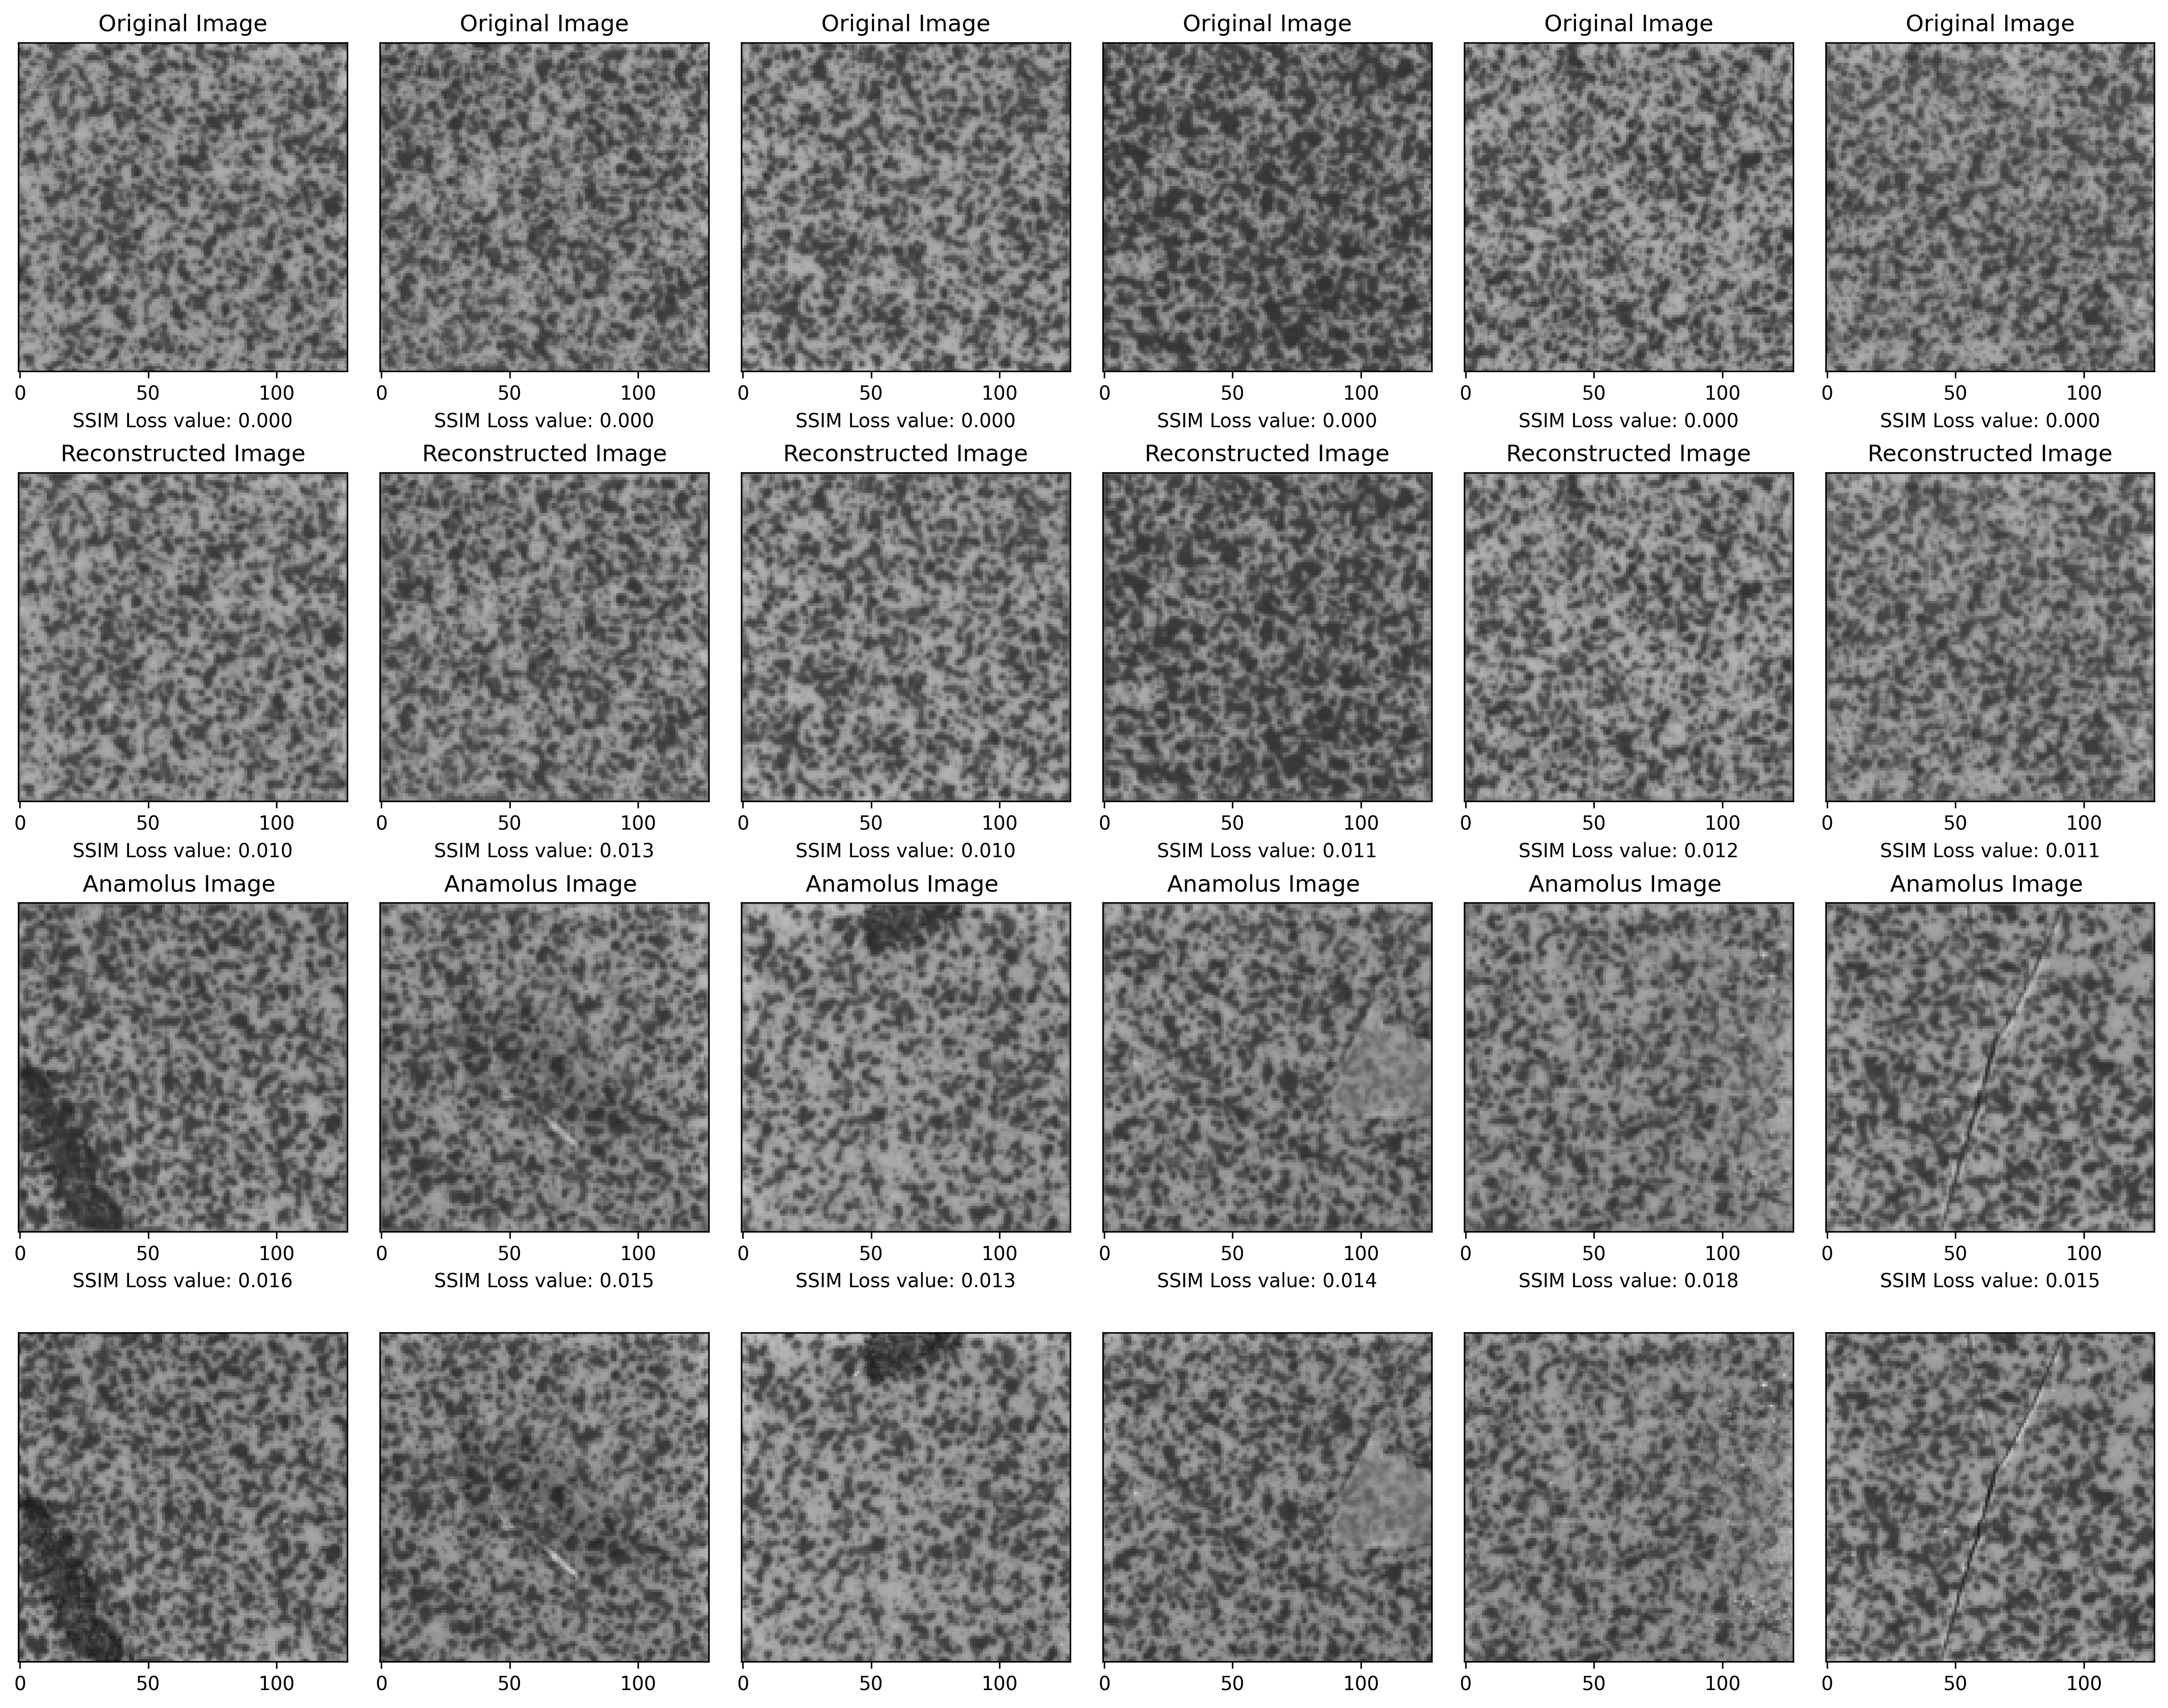

In [7]:
n = 6  # how many encoded and decoded images we will display
decoded_imgs= model.predict(X_train)
decoded_mnistimgs= model.predict(X_test)
plt.figure(figsize=(20, 20), dpi=300)
plt.subplots_adjust( wspace=0.1, hspace=0.07)
plt_a=1
SSIM_array=[]
for i in range(n):
    # Original training dataset vs Original training
    ax = plt.subplot(5, n, plt_a   )
    plt.imshow(X_train[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    value_a = SSIMLoss(X_train[i], X_train[i])

    ax.set_title("Original Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )

    # Reconstructed good data  vs Original training data
    ax = plt.subplot(5, n, plt_a + n )
    plt.imshow(decoded_imgs[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    gg=tf.dtypes.cast(X_train[i], tf.float32)
    value_a = SSIMLoss(decoded_imgs[i], gg)
    SSIM_array.append(value_a)
    ax.set_title("Reconstructed Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )



    # Reconstructed anomalous data  vs Original training data
    ax = plt.subplot(5, n, plt_a + 2*n)
    plt.imshow(decoded_mnistimgs[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    gg1=tf.dtypes.cast(X_test[i], tf.float32)
    value = SSIMLoss(decoded_mnistimgs[i], gg1)
    SSIM_array.append(value)
    label = 'SSIM Loss value: {:.3f}'
    ax.set_title("Anamolus Image " )
    ax.set_xlabel(label.format(value) )


    ax = plt.subplot(5, n, plt_a + 3*n )
    plt.imshow(X_test[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    #gg=tf.dtypes.cast(X_train[i], tf.float32)
    plt_a+=1
plt.show()

In [8]:
SSIM_arr=[]
gt_arr=[]
for i in range(len(decoded_imgs)):
  gg=tf.dtypes.cast(X_train[i], tf.float32)
  value_a = SSIMLoss(decoded_imgs[i], gg)
  SSIM_arr.append(value_a)
  gt_arr.append(0)


for i in range(len(decoded_mnistimgs)):
  gg1=tf.dtypes.cast(X_test[i], tf.float32)
  value_a = SSIMLoss(decoded_mnistimgs[i], gg1)
  SSIM_arr.append(value_a)
  gt_arr.append(1)
print(len(SSIM_arr))

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [9]:
print(np.array(SSIM_arr))
print(np.array(gt_arr))

[0.01042032 0.01306385 0.01018715 0.01137251 0.01183987 0.01108021
 0.01136971 0.01206797 0.01284534 0.01276851 0.01112038 0.01132298
 0.01300764 0.00899774 0.00922555 0.01031989 0.0088315  0.0098682
 0.01091576 0.01305705 0.01151401 0.01235348 0.01016092 0.00996095
 0.01129723 0.00777912 0.01270074 0.01117736 0.00925523 0.01194638
 0.01154047 0.0122025  0.01335365 0.0116027  0.00982112 0.01027268
 0.01022196 0.01105356 0.01093882 0.00956732 0.01032799 0.01162893
 0.01606482 0.00940847 0.01157731 0.00863248 0.0104546  0.01225561
 0.01098961 0.01038408 0.01239187 0.01162416 0.0095734  0.01173353
 0.010427   0.01103836 0.0116871  0.01559114 0.01197034 0.01195067
 0.01075894 0.01104259 0.0127902  0.00812596 0.00934982 0.00916857
 0.01017427 0.0111739  0.01125282 0.01348585 0.0115729  0.01215339
 0.01289678 0.01001614 0.01300949 0.00986177 0.00981265 0.01411277
 0.01015496 0.01039404 0.0097906  0.01348525 0.01328927 0.01105493
 0.00991541 0.01072007 0.01042747 0.01814222 0.00936794 0.01047

In [10]:
np.save("gt_arr.npy",np.array(gt_arr))
np.save("SSIM_arr.npy",np.array(SSIM_arr))

In [11]:
#np_load_old = np.load

# modify the default parameters of np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
y_true = np.load('SSIM_arr.npy') #FL preidcted regularity scores
print('Shape of SSIM_arr', y_true.shape)
y_pred = np.load('gt_arr.npy') #FL ground truth
print('gt_arr.npy', y_pred.shape)
#np.load = np_load_old

Shape of SSIM_arr (314,)
gt_arr.npy (314,)


Text(0, 0.5, 'True Positive Rate')

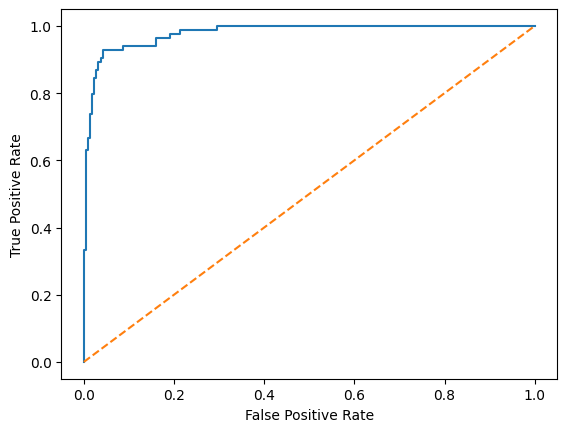

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, auc
from numpy import sqrt
from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_pred, y_true)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC-ROC curve = %0.3f' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--', label='Binary Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

0.08695652173913043
0.0714285714285714
Area under the ROC curve : 0.979348
Best Threshold=0.013731, G-Mean=0.942
AUC-ROC=0.979348


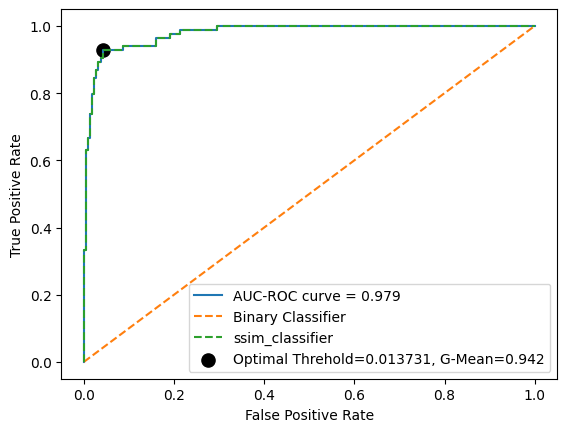

In [13]:
fpr, tpr, threshold = roc_curve(y_pred, y_true, pos_label=1)
fnr = 1 - tpr
tnr= 1- fpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
n=np.array([tpr, fpr])
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
print(EER)
dataset_name="tile"
#as a sanity check the value should be close to

EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]

print(EER)
print("Area under the ROC curve : %f" % roc_auc)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print('AUC-ROC=%f'  % (roc_auc))
th=thresholds[ix]
plt.clf()
plt.plot(fpr, tpr, label='AUC-ROC curve = %0.3f' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--', label='Binary Classifier')
plt.plot(fpr, tpr, linestyle='--', label='ssim_classifier')
#pyplot.plot(roc_auc='.', label='AUC-ROC')
#pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', s=90, label='Best')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', s=90, label='Optimal Threhold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig(f'{dataset_name}__OT.jpg',bbox_inches='tight')
plt.show()

In [14]:
print(y_pred)
y_pred_binary=[]

for i in y_true:
  if i >=th:
    y_pred_binary.append(1)
  else:
    y_pred_binary.append(0)

y_pred_binary_1=np.array(y_pred_binary )
print(np.array(y_pred_binary))


tn, fp, fn, tp =confusion_matrix(y_pred,y_pred_binary_1).ravel()
acc=(tn+tp)/(tn+ fp+ fn+ tp)*100
print(confusion_matrix(y_pred,y_pred_binary_1))
acc

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

94.90445859872611

In [15]:
f1_score(y_pred_binary,y_pred)

0.9069767441860465

In [16]:
from sklearn.metrics import average_precision_score

average_precision_score(y_pred, y_pred_binary)

0.8421602283067251

In [27]:
import csv
print(np.transpose(n))

rows = ["{},{}".format(i, j) for i, j in np.transpose(n)]
text = "\n".join(rows)
              #  adding header
headerList = ['i_tpr', 'i_fpr']


                # converting data frame to csv
with open(f'{dataset_name}_image.csv', 'w') as f:
    dw = csv.DictWriter(f, delimiter=',',fieldnames=headerList)
    dw.writeheader()
    f.write(text)
                
print("-------------------------in_display2---------------------------")
                
print(tpr,fpr)

[[0.         0.        ]
 [0.01190476 0.        ]
 [0.5952381  0.        ]
 [0.5952381  0.00434783]
 [0.76190476 0.00434783]
 [0.76190476 0.00869565]
 [0.88095238 0.00869565]
 [0.88095238 0.01304348]
 [0.89285714 0.01304348]
 [0.89285714 0.0173913 ]
 [0.92857143 0.0173913 ]
 [0.92857143 0.02173913]
 [0.95238095 0.02173913]
 [0.95238095 0.04347826]
 [0.96428571 0.04347826]
 [0.96428571 0.05217391]
 [0.97619048 0.05217391]
 [0.97619048 0.06086957]
 [0.98809524 0.06086957]
 [0.98809524 0.11304348]
 [1.         0.11304348]
 [1.         1.        ]]
-------------------------in_display2---------------------------
[0.         0.01190476 0.5952381  0.5952381  0.76190476 0.76190476
 0.88095238 0.88095238 0.89285714 0.89285714 0.92857143 0.92857143
 0.95238095 0.95238095 0.96428571 0.96428571 0.97619048 0.97619048
 0.98809524 0.98809524 1.         1.        ] [0.         0.         0.         0.00434783 0.00434783 0.00869565
 0.00869565 0.01304348 0.01304348 0.0173913  0.0173913  0.02173913
 0.0

Best Threshold=0.012434, F-Score=0.947


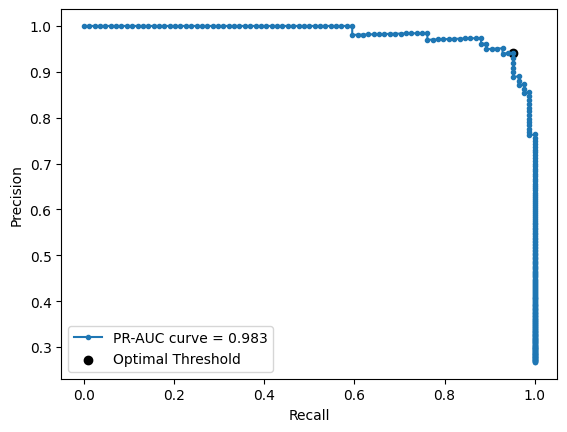

[[1.         0.26751592]
 [1.         0.26837061]
 [1.         0.26923077]
 [1.         0.27009646]
 [1.         0.27096774]
 [1.         0.27184466]
 [1.         0.27272727]
 [1.         0.27361564]
 [1.         0.2745098 ]
 [1.         0.27540984]
 [1.         0.27631579]
 [1.         0.27722772]
 [1.         0.2781457 ]
 [1.         0.27906977]
 [1.         0.28      ]
 [1.         0.28093645]
 [1.         0.28187919]
 [1.         0.28282828]
 [1.         0.28378378]
 [1.         0.28474576]
 [1.         0.28571429]
 [1.         0.28668942]
 [1.         0.28767123]
 [1.         0.28865979]
 [1.         0.28965517]
 [1.         0.29065744]
 [1.         0.29166667]
 [1.         0.29268293]
 [1.         0.29370629]
 [1.         0.29473684]
 [1.         0.29577465]
 [1.         0.29681979]
 [1.         0.29787234]
 [1.         0.29893238]
 [1.         0.3       ]
 [1.         0.30107527]
 [1.         0.30215827]
 [1.         0.3032491 ]
 [1.         0.30434783]
 [1.         0.30545455]


In [17]:
import keras.losses

#keras.losses.custom_loss = SSIMLoss


#model = tf.keras.models.load_model('cable3.h5',custom_objects ={'SSIMLoss':SSIMLoss})
#model.compile(optimizer='adam', loss='SSIMLoss')

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

precision, recall, thresholds = precision_recall_curve(y_pred, y_true)
auc_score = auc(recall, precision)
p=np.array([recall, precision])
#pyplot.plot(recall, precision, marker='.', label='Logistic')
# convert to f score

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
#no_skill = len(testy[testy==1]) / len(testy)
#pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='Binary')
pyplot.plot(recall, precision, marker='.',label='PR-AUC curve = %0.3f' % auc_score)
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Optimal Threshold')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

import csv
print(np.transpose(p))

rows = ["{},{}".format(i, j) for i, j in np.transpose(p)]
text = "\n".join(rows)
              #  adding header
headerList = ['recall', 'precision']


                # converting data frame to csv
with open(f'{dataset_name}_pr.csv', 'w') as f:
    dw = csv.DictWriter(f, delimiter=',',fieldnames=headerList)
    dw.writeheader()
    f.write(text)
                
print("-------------------------in_display2---------------------------")
                
print(precision, recall)

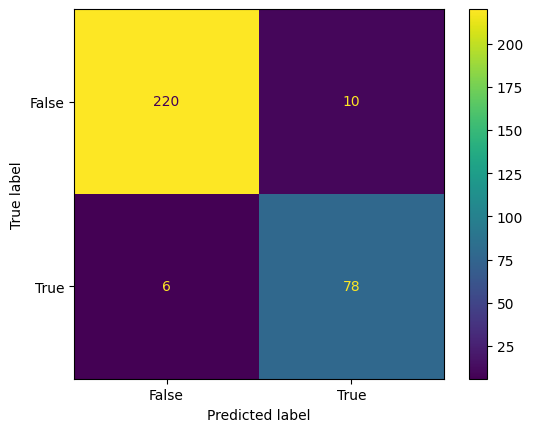

In [17]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

 

confusion_matrix = metrics.confusion_matrix(y_pred,y_pred_binary_1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.savefig(f'{dataset_name}_conmat.jpg')
plt.show() 

In [3]:
import glob
import os
import shutil

# Location with subdirectories
dir_src = "/home/ai/Pritha/mvt/tile/test"

# Destination location to copy all the files
dir_dst = "tile_o/test2/2_defective/defective"

# Get List of all images
files = glob.glob(dir_src + '/**/*.png', recursive=True)

# Create the destination directory
if not os.path.exists(dir_dst):
    makedirs(dir_dst)
    
x="good"
# For each image
for file_name_src in files:
    if x not in file_name_src:
                
    # Let's say file_name_src is currently "/home/nponcian/Documents/folder_with_subfolders/Subfolder_1/Subfolder1_1/Subfolder_with_patientID1/2.dcm"
         file_dir = os.path.basename(os.path.dirname(file_name_src))  # Would be "Subfolder_with_patientID1"
         file_name = os.path.basename(file_name_src)  # Would be "2.dcm"

         file_name_dst = os.path.join(dir_dst, f"{file_dir}_{file_name}")  # Would be "/home/nponcian/Documents/folder_with_subfolders_dest/Subfolder_with_patientID1_2.dcm"

         shutil.copy2(file_name_src, file_name_dst)
         print(f"Copied:\n\tFr: {file_name_src}\n\tTo: {file_name_dst}")

Copied:
	Fr: /home/ai/Pritha/mvt/tile/test/glue_strip/003.png
	To: tile_o/test2/2_defective/defective/glue_strip_003.png
Copied:
	Fr: /home/ai/Pritha/mvt/tile/test/glue_strip/013.png
	To: tile_o/test2/2_defective/defective/glue_strip_013.png
Copied:
	Fr: /home/ai/Pritha/mvt/tile/test/glue_strip/011.png
	To: tile_o/test2/2_defective/defective/glue_strip_011.png
Copied:
	Fr: /home/ai/Pritha/mvt/tile/test/glue_strip/016.png
	To: tile_o/test2/2_defective/defective/glue_strip_016.png
Copied:
	Fr: /home/ai/Pritha/mvt/tile/test/glue_strip/012.png
	To: tile_o/test2/2_defective/defective/glue_strip_012.png
Copied:
	Fr: /home/ai/Pritha/mvt/tile/test/glue_strip/014.png
	To: tile_o/test2/2_defective/defective/glue_strip_014.png
Copied:
	Fr: /home/ai/Pritha/mvt/tile/test/glue_strip/000.png
	To: tile_o/test2/2_defective/defective/glue_strip_000.png
Copied:
	Fr: /home/ai/Pritha/mvt/tile/test/glue_strip/015.png
	To: tile_o/test2/2_defective/defective/glue_strip_015.png
Copied:
	Fr: /home/ai/Pritha/mvt